# Visualization

If your plots do not show, include this in any cell. The `%` signals that this is an 
ipython [magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html). This one controls [matplotlib](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib). Jupyter uses the [IPython](https://ipython.readthedocs.io/en/stable/about/history.html) python kernel.

In [1]:
%matplotlib inline

Today's imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

## Summarizing Review
We will start with the same dataset we hvae been working with

In [3]:
robusta_data_url = 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/robusta_data_cleaned.csv'

In [4]:
robusta_df = pd.read_csv(robusta_data_url)

Is the robust coffee's `Mouthfeel` or the `Aftertaste` more consistently scored in this dataset?


Why?

In [5]:
robusta_df[['Mouthfeel','Aftertaste']].describe()

,Mouthfeel,Aftertaste
count,28.000000,28.000000
mean,7.506786,7.559643
std,0.725152,0.342469
min,5.080000,6.500000
25%,7.500000,7.397500
50%,7.670000,7.670000
75%,7.830000,7.770000
max,8.250000,7.920000


from the lower `std` we can see that Aftertaste is more consistently rated.

We can also save this subset into a smaller dataframe to work with it more and plot it.

In [6]:
rob_ma_df = robusta_df[['Mouthfeel','Aftertaste']]
rob_ma_df.head(1)

,Mouthfeel,Aftertaste
0,8.25,7.75


We will use [`sns.displot`](https://seaborn.pydata.org/generated/seaborn.displot.html) to look at how the data is distributed. 

```{important}
For `seaborn` the online documentation is **immensely** valuable.  Every function's page has basic documentation and lots of examples, so you can see how they use different paramters to modify plots visually. I **strongly recommend reading it often**. I recommend reading [their tutorial too](https://seaborn.pydata.org/tutorial/introduction.html)
```

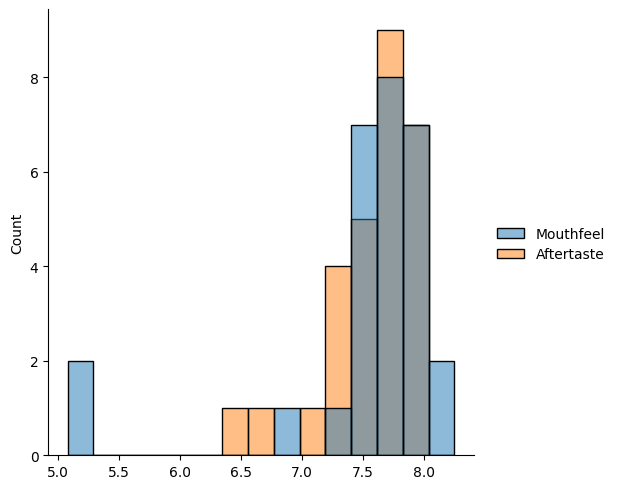

In [7]:
sns.displot(rob_ma_df)

We can change the kind, for example to a [Kernel Density Estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation).
This approximates the distribution of the data, you can think of it rougly like
a smoothed out histogram.

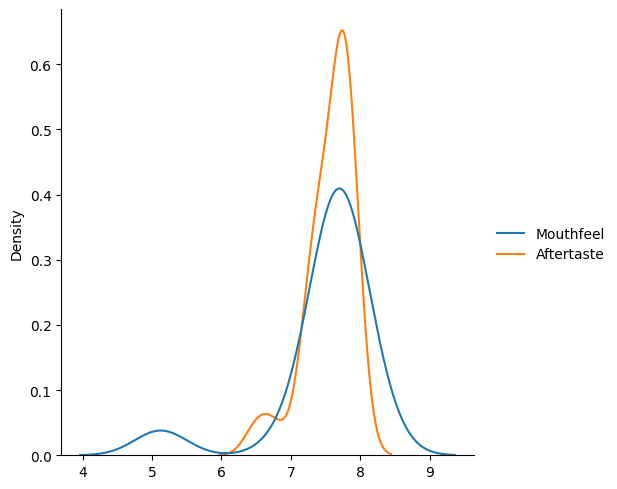

In [8]:
sns.displot(rob_ma_df,kind='kde')

This version makess it more visually clear that the the Aftertaste is more consistently, but it also helps us see that that might not be the whole story.  Both have a second smaller bump, so the overall std might not be the best measure.

```{admonition} Question from class
Why do we need two sets of brackets?
```

It tries to use them to index in multiple ways instead.

In [9]:
robusta_df['Aftertaste','Mouthfeel']

KeyError: ('Aftertaste', 'Mouthfeel')

It tries to look for a [multiindex](https://pandas.pydata.org/docs/user_guide/advanced.html#hierarchical-indexing-multiindex), but we do not have one so it fails.  THe second square brackets, makes it a list of names to use and  pandas looks for them sequentially.



We will use a larger dataset for more interesting plots.

In [10]:
arabica_data_url = 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv'

In [11]:
coffee_df = pd.read_csv(arabica_data_url)

## Plotting in Python

- [matplotlib](https://matplotlib.org/): low level plotting tools
- [seaborn](https://seaborn.pydata.org/index.html): high level plotting with opinionated defaults
- [ggplot](https://yhat.github.io/ggpy/): plotting based on the ggplot library in R.


Pandas and seaborn use matplotlib under the hood.

````{margin}
```{admonition}  Think Ahead
Learning ggplot is a way to earn level 3 for visualize
```
````
Seaborn and ggplot both assume the data is set up as a DataFrame.
Getting started with seaborn is the simplest, so we'll use that.


There are lots of type of plots, we saw the basic patterns of how to use them and we've used a few types, but we cannot (and do not need to) go through every single type.  There are general patterns that you can use that will help you think about what type of plot you might want and help you understand them to be able to customize plots.  

[Seaborn's main goal is opinionated defaults and flexible customization](https://seaborn.pydata.org/tutorial/introduction.html#opinionated-defaults-and-flexible-customization

### Anatomy of a figure

First is the [matplotlib](https://matplotlib.org) structure of a figure.  BOth pandas and seaborn and other plotting libraries use matplotlib. Matplotlib was used [in visualizing the first Black hole](https://numfocus.org/case-studies/first-photograph-black-hole).

![annotated graph](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png)

This is a lot of information, but these are good to know things.  THe most important is the figure and the axes.

```{admonition} Try it Yourself
Make sure you can explain what is a figure and what are axes in your own words and why that distinction matters. Discuss in office hours if you are unsure.
```

*that image was [drawn with code](https://matplotlib.org/stable/gallery/showcase/anatomy.html#anatomy-of-a-figure)* and that page explains more.


### Plotting Function types in Seaborn

Seaborn has two *levels* or groups of plotting functions. Figure and axes.  Figure level fucntions can plot with subplots.

![summary of plot types](https://seaborn.pydata.org/_images/function_overview_8_0.png)


This is from thie [overivew]() section of the official seaborn tutorial. It also includes a comparison of
[figure vs axes](https://seaborn.pydata.org/tutorial/function_overview.html#relative-merits-of-figure-level-functions) plotting.

The [official introduction](https://seaborn.pydata.org/tutorial/introduction.html) is also a good read.

### More

The [seaborn gallery](https://seaborn.pydata.org/examples/index.html) and [matplotlib gallery](https://matplotlib.org/2.0.2/gallery.html) are nice to look at too.

### Styling in Seaborn
Seaborn also lets us set a theme for visual styling 
This by default styles the plots to be more visually appealing

In [12]:
sns.set_theme(palette='colorblind')

the colorblind palette is more distinguishable under a variety fo colorblindness types. [for more](https://gist.github.com/mwaskom/b35f6ebc2d4b340b4f64a4e28e778486). 
Colorblind is a good default, but you can choose others that you like more too.

[more on colors](https://seaborn.pydata.org/tutorial/color_palettes.html#general-principles-for-using-color-in-plots)


## Bags by country

the `catplot` lets us plot vs categorical variables.

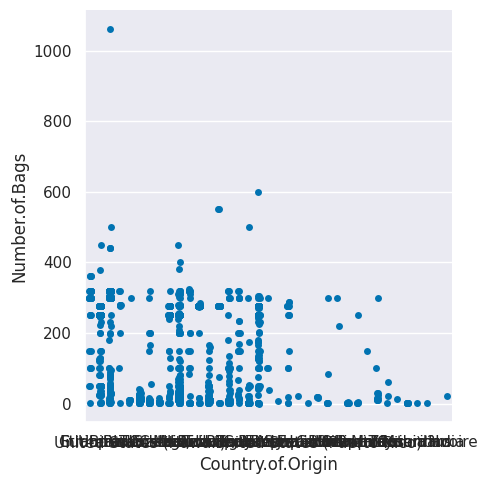

In [13]:
sns.catplot(data=coffee_df, y='Number.of.Bags',x='Country.of.Origin')

This is hard to read, we could try stretching it out to make it better

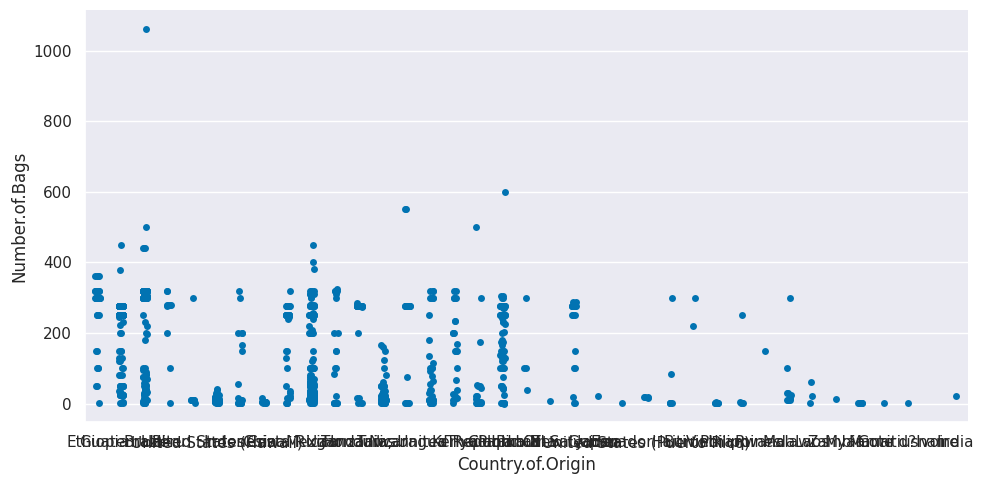

In [14]:
sns.catplot(data=coffee_df, y='Number.of.Bags',x='Country.of.Origin',aspect=2)

A better way might be to filter only the top countries. We'll find those by grouping by country
then summing each smaller dataframe that groupby creates.

In [15]:
tot_per_country = coffee_df.groupby('Country.of.Origin')['Number.of.Bags'].sum()
tot_per_country.head()

Country.of.Origin
Brazil        30534
Burundi         520
China            55
Colombia      41204
Costa Rica    10354
Name: Number.of.Bags, dtype: int64

We can plot this now this way

<Axes: xlabel='Country.of.Origin'>

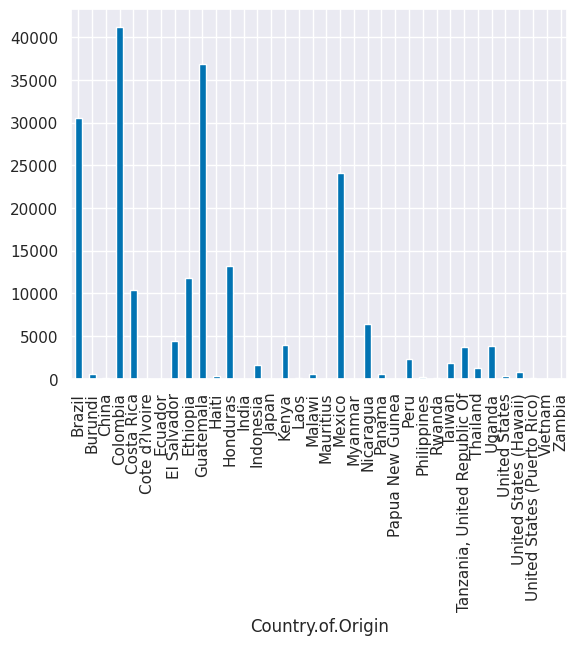

In [16]:
tot_per_country.plot(kind='bar')

What if we take out only the top 10 countries? First we have to sort it.  The default
is to sort ascending so we use `ascending=False` to switch. pandas doesn'thave a plain `sort` 
method, we have to say if we want to sort by the values or the index.  In this Series, the
total number per for each country are the values and the country names are the index.

In [17]:
tot_per_country.sort_values(ascending=False)[:10]

Country.of.Origin
Colombia       41204
Guatemala      36868
Brazil         30534
Mexico         24140
Honduras       13167
Ethiopia       11761
Costa Rica     10354
Nicaragua       6406
El Salvador     4449
Kenya           3971
Name: Number.of.Bags, dtype: int64

We can alo plot this

<Axes: xlabel='Country.of.Origin'>

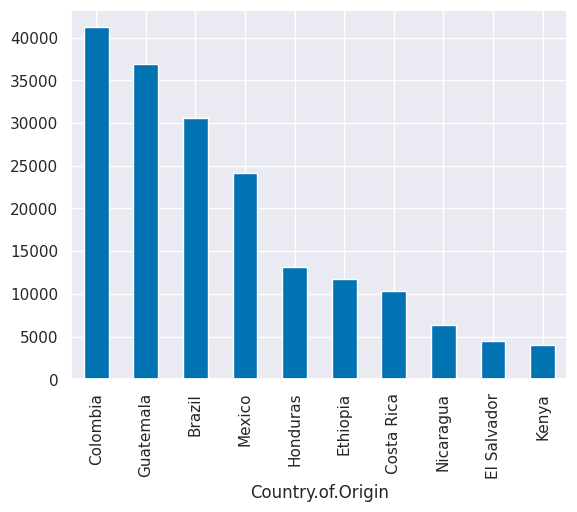

In [18]:
tot_per_country.sort_values(ascending=False)[:10].plot(kind='bar')

## Filtering a DataFrame
Now, we'll take just the country names out

In [19]:
top_countries = tot_per_country.sort_values(ascending=False)[:10].index
top_countries

Index(['Colombia', 'Guatemala', 'Brazil', 'Mexico', 'Honduras', 'Ethiopia',
       'Costa Rica', 'Nicaragua', 'El Salvador', 'Kenya'],
      dtype='object', name='Country.of.Origin')

and we can use that to filter the original `DataFrame`. To do this, we use [`isin`](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin) to check each element in the `'Country.of.Origin'` column is in that list.

In [20]:
coffee_df['Country.of.Origin'].isin(top_countries)

0        True
1        True
2        True
3        True
4        True
        ...  
1306     True
1307    False
1308     True
1309     True
1310     True
Name: Country.of.Origin, Length: 1311, dtype: bool

This is roughly equivalent to:

In [21]:
[country in top_countries for country in coffee_df['Country.of.Origin'] ]

[True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 Tr

except this builds a list and the pandas way makes a `pd.Series` object. The Python [`in` operator](https://docs.python.org/3/reference/expressions.html#in) is really helpful to know and pandas offers us an `isin` method to get that type of pattern. 

In a more basic programming format this process would be two separate loops worth of work.

In [22]:
c_in = []
# iterate over the country of each rating
for country in coffee_df['Country.of.Origin']:
    # make a false temp value
    cur_search = False
    # iterate over top countries
    for tc in top_countries:
        # flip the value if the current top & rating cofee match
        if tc==country:
            cur_search = True
    # save the result of the search
    c_in.append(cur_search)

```{admonition} Try it yourself
Run these versions and confirm for yourself that they are the same. 
```

With that list of booleans, we can then [mask the original DataFrame](https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing). This keeps only the value where the inner quantity is `True`

In [23]:
top_coffee_df = coffee_df[coffee_df['Country.of.Origin'].isin(top_countries)]
top_coffee_df.head(1)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [24]:
top_coffee_df.shape, coffee_df.shape

((952, 44), (1311, 44))

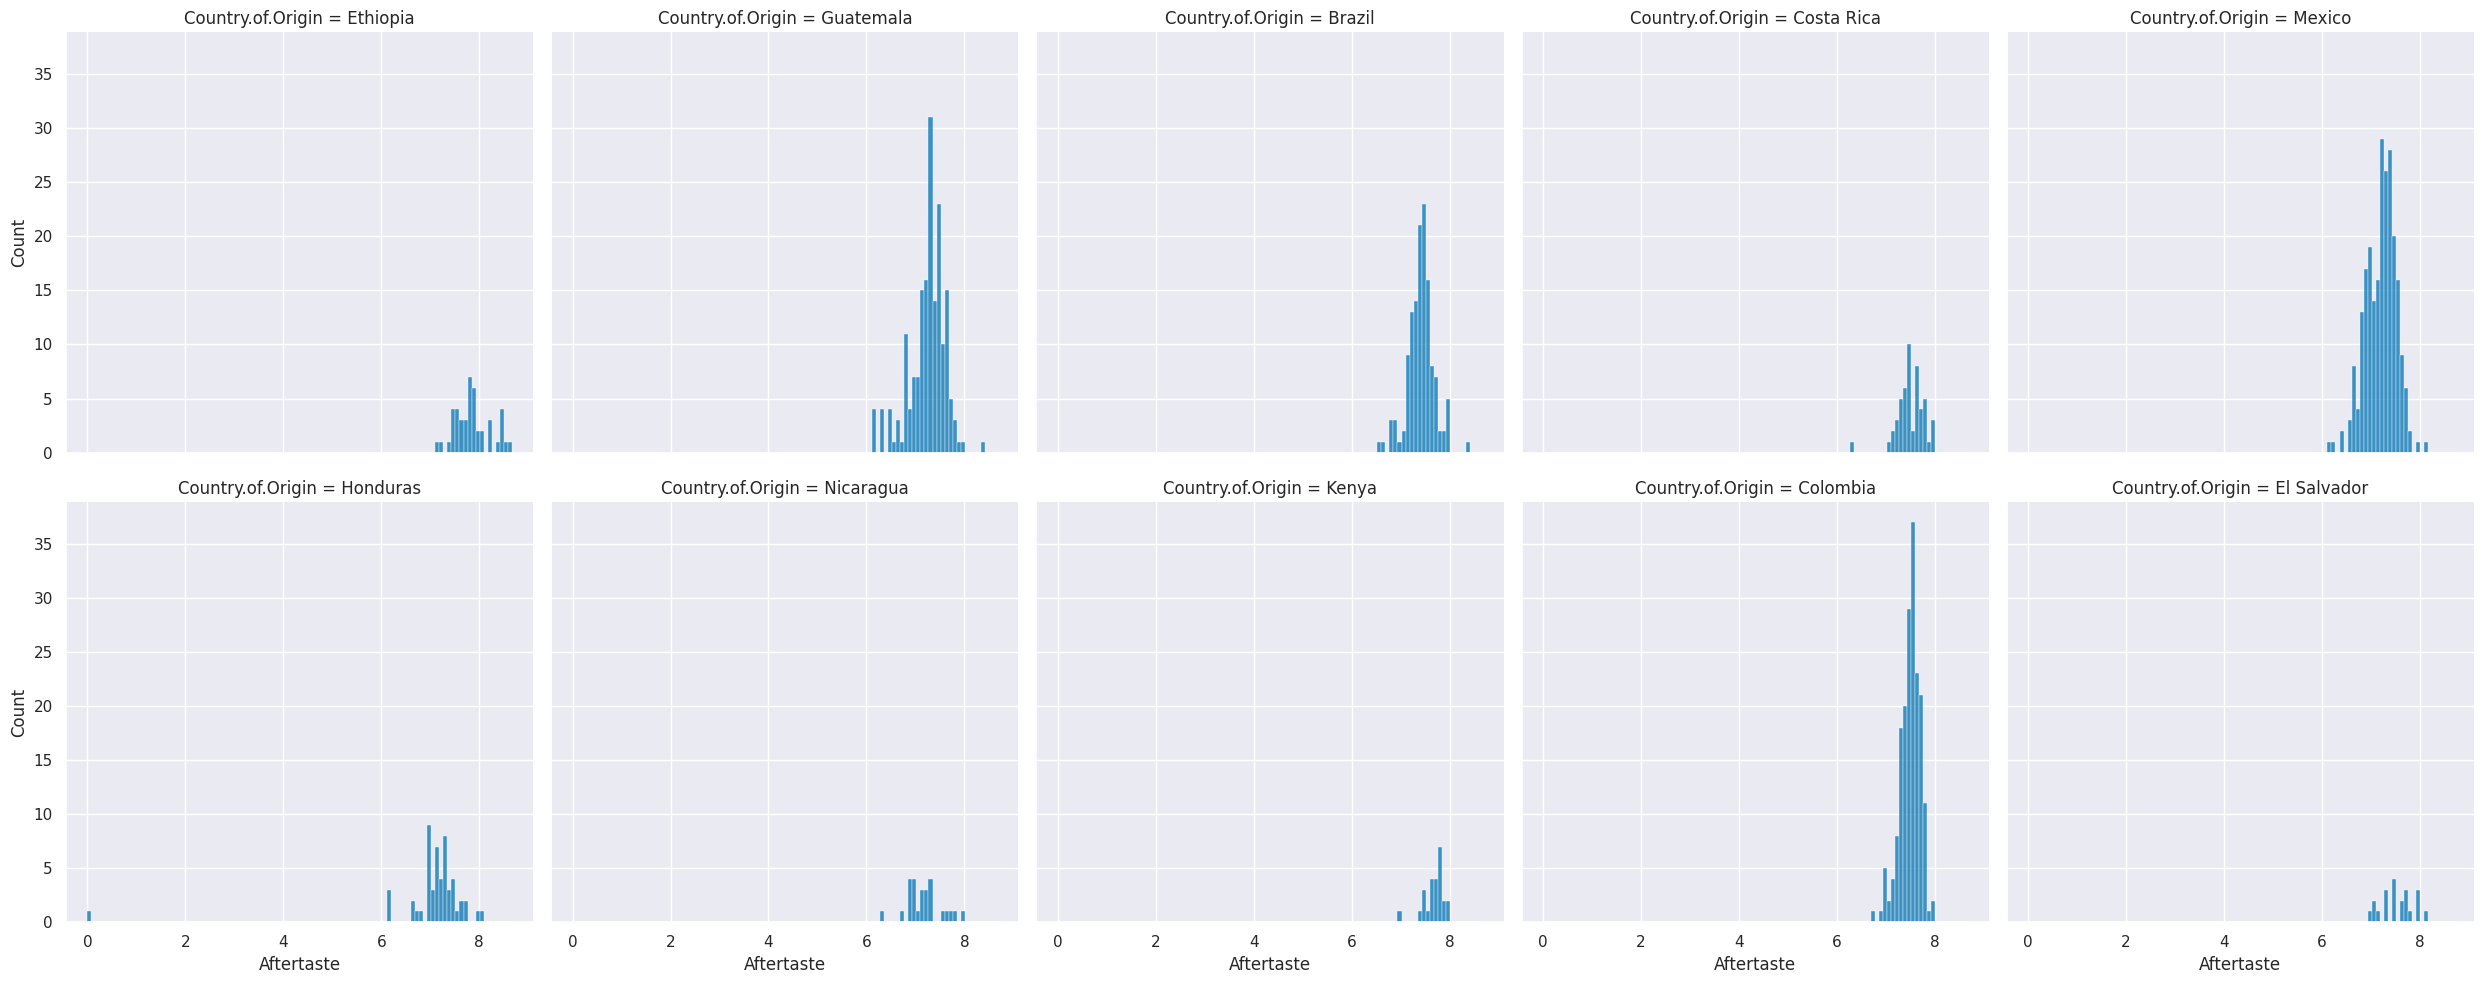

In [25]:
sns.displot(data=top_coffee_df,x='Aftertaste', col='Country.of.Origin',col_wrap=5)

## Variable types and data types

Related but not the same.

---

Data types are literal, related to the representation in the computer.

ther can be `int16, int32, int64`

---

We can also have mathematical types of numbers

- Integers can be positive, 0, or negative.
- Reals are continuous, infinite possibilities.
---


Variable types are about the meaning in a conceptual sense.

- **categorical** (can take a discrete number of values, could be used to group data,
  could be a string or integer; unordered)
- **continuous** (can take on any possible value, always a number)
- **binary** (like data type boolean, but could be represented as yes/no, true/false,
  or 1/0, could be categorical also, but often makes sense to calculate rates)
- **ordinal** (ordered, but appropriately categorical)

we'll focus on the first two most of the time. Some values that are technically
only integers range high enough that we treat them more like continuous most of
the time.

## Questions After Class

### Do we earn  level 3's  the same way level 1 and 2 are or are there more steps required?

You earn level 3s from your portfio.  The portfolio makes more sense after you have completed assignment 3, so we will follow up on it next week after you all get a3 feedback. 

### How can I check what parameters can go into a method?
You can use the documentation online, or in jupyter, you can get help from the docstring.  I usually use shift+tab to read the docstring but you can also use the `help()` function or the `?` in jupyter. 

### How do you know you can put kind = "bar" into the method?
I happen to reembmer this now, but to know what values you can read the docstring as above. 

### Do companies use things like "sns" for more in depth/graphical plots? 

It depends on your role within the company.  If you are a data scientist in a more reasearch role you might use seaborn more, but if you build customer facing visualizations, you might use something else.  

For more interactive visualization, you could use [plotly](https://plotly.com/python/) or [bokeh](https://docs.bokeh.org/en/latest/) that generate more javascript for you. [Plotly](https://plotly.com/) as a company now also has a product called [dash](https://dash.plotly.com/) for building data dashboard apps. 
 


###  Does "component disciplines" mean statistics, computer science and domain expertise,, and does "phases" mean collect, clean, explore, model and deploy?

Yes. 

```{important} 
I updated the assignment text to clarify in response to some questions
```